
Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Loading Data

In [3]:
data = pd.read_csv("/content/riceClassification.csv")

Preprocessing of Data

In [4]:
print('Total number of rows are:', data.shape[0])
print('Total number of columns are:', data.shape[1])

Total number of rows are: 18185
Total number of columns are: 12


In [5]:
data.head()

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   1  4537        92.229316        64.012769      0.719916        4677   
1   2  2872        74.691881        51.400454      0.725553        3015   
2   3  3048        76.293164        52.043491      0.731211        3132   
3   4  3073        77.033628        51.928487      0.738639        3157   
4   5  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0      76.004525  0.657536    273.085   0.764510      1.440796      1  
1      60.471018  0.713009    208.317   0.831658      1.453137      1  
2      62.296341  0.759153    210.012   0.868434      1.465950      1  
3      62.551300  0.783529    210.657   0.870203      1.483456      1  
4      68.571668  0.769375    230.332   0.874743      1.510000      1

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [7]:
data.describe()

id          Area  MajorAxisLength  MinorAxisLength  \
count  18185.000000  18185.000000     18185.000000     18185.000000   
mean    9093.000000   7036.492989       151.680754        59.807851   
std     5249.701658   1467.197150        12.376402        10.061653   
min        1.000000   2522.000000        74.133114        34.409894   
25%     4547.000000   5962.000000       145.675910        51.393151   
50%     9093.000000   6660.000000       153.883750        55.724288   
75%    13639.000000   8423.000000       160.056214        70.156593   
max    18185.000000  10210.000000       183.211434        82.550762   

       Eccentricity    ConvexArea  EquivDiameter        Extent     Perimeter  \
count  18185.000000  18185.000000   18185.000000  18185.000000  18185.000000   
mean       0.915406   7225.817872      94.132952      0.616653    351.606949   
std        0.030575   1502.006571       9.906250      0.104389     29.500620   
min        0.676647   2579.000000      56.666658      0.383239    197.015000   
25%        0.891617   6125.000000      87.126656      0.538530    333.990000   
50%        0.923259   6843.000000      92.085696      0.601194    353.088000   
75%        0.941372   8645.000000     103.559146      0.695664    373.003000   
max        0.966774  11008.000000     114.016559      0.886573    508.511000   

          Roundness  AspectRation         Class  
count  18185.000000  18185.000000  18185.000000  
mean       0.707998      2.599081      0.549079  
std        0.067310      0.434836      0.497599  
min        0.174590      1.358128      0.000000  
25%        0.650962      2.208527      0.000000  
50%        0.701941      2.602966      1.000000  
75%        0.769280      2.964101      1.000000  
max        0.904748      3.911845      1.000000

In [8]:
data.isna().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [9]:
print("No. of duplicate data : ",data.duplicated().sum())

No. of duplicate data :  0


In [10]:
print("Columns in data : ",data.columns)

Columns in data :  Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')


### EDA

Since all data is of type "int" or "float" we don't have any direct categorical column in data even though "class" is a categorical column.

In [11]:
categorical_cols = ["Class"]
numerical_cols = []
for col in data.columns:
  if col not in categorical_cols:
    numerical_cols.append(col)

In [12]:
numerical_cols

['id',
 'Area',
 'MajorAxisLength',
 'MinorAxisLength',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Perimeter',
 'Roundness',
 'AspectRation']

In [13]:
categorical_cols

['Class']

In [14]:
for col in categorical_cols:
    print(data[col].value_counts())

1    9985
0    8200
Name: Class, dtype: int64


In [15]:
d = list(data["Class"].unique())
d

[1, 0]

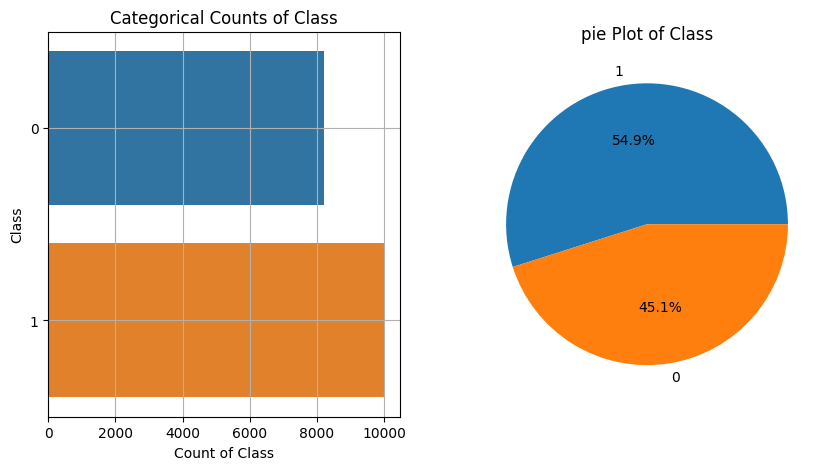

In [16]:
for col in categorical_cols:
    plt.figure(figsize = [10,5])
    plt.subplot(1, 2, 1)
    plt.title("Categorical Counts of {}".format(col))
    sns.countplot(data = data, y = col)
    plt.xlabel("Count of {}".format(col))
    plt.ylabel(col)
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.title("pie Plot of {}".format(col))
    mylabels = list(data["Class"].unique())
    plt.pie(data[col].value_counts(), labels = mylabels,autopct='%1.1f%%')
    plt.grid()
    plt.show()

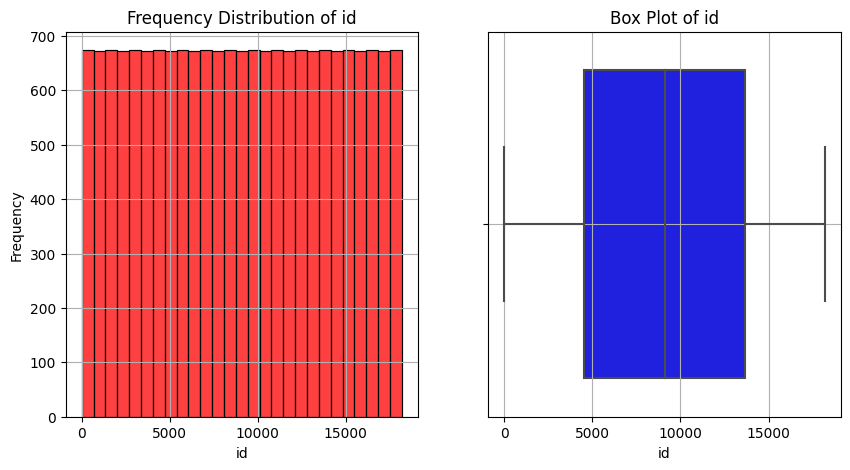

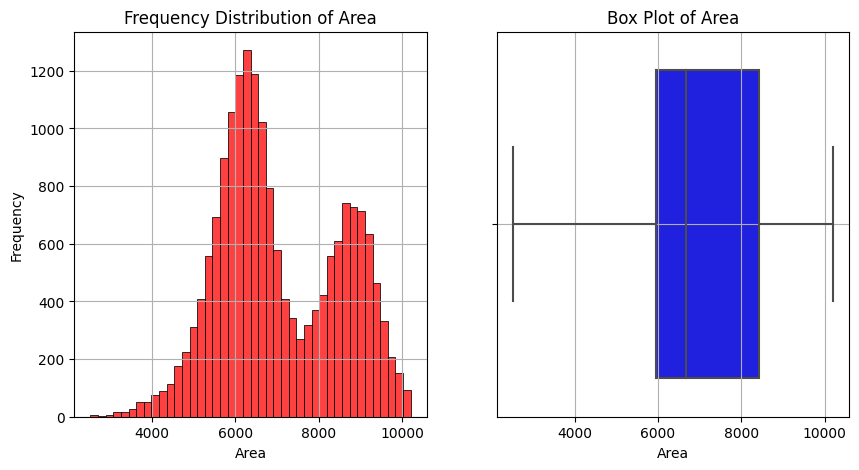

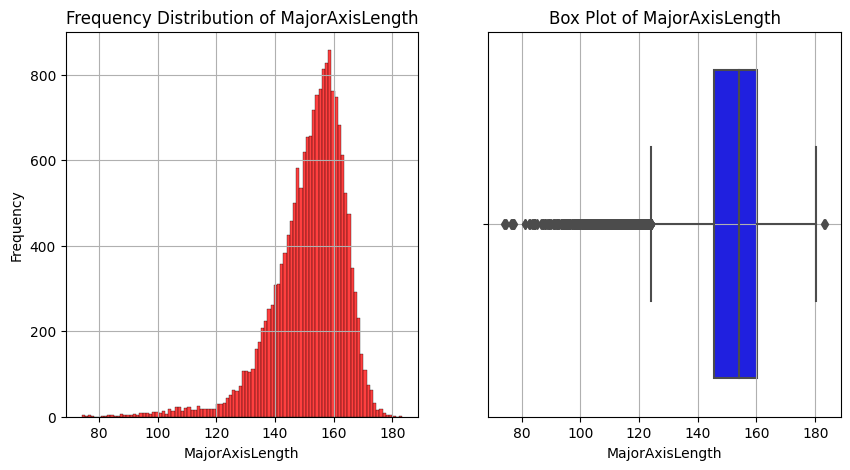

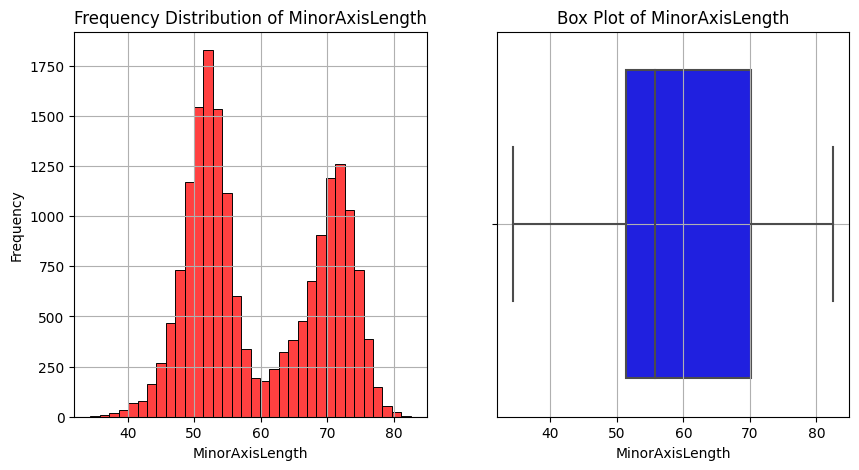

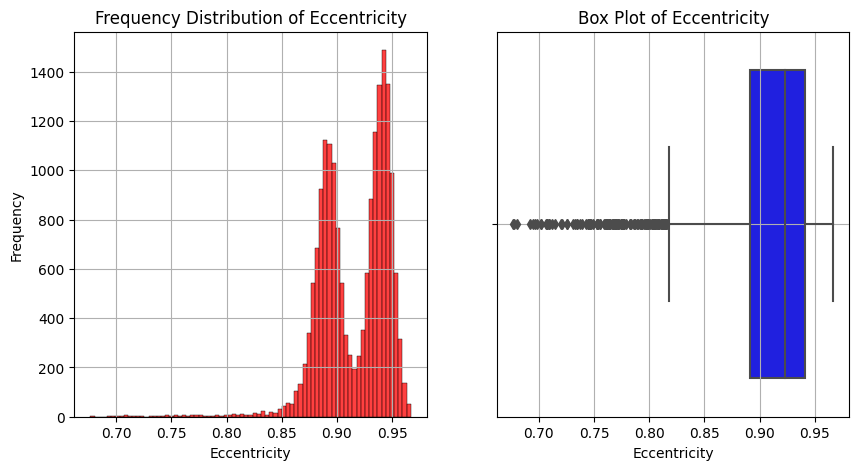

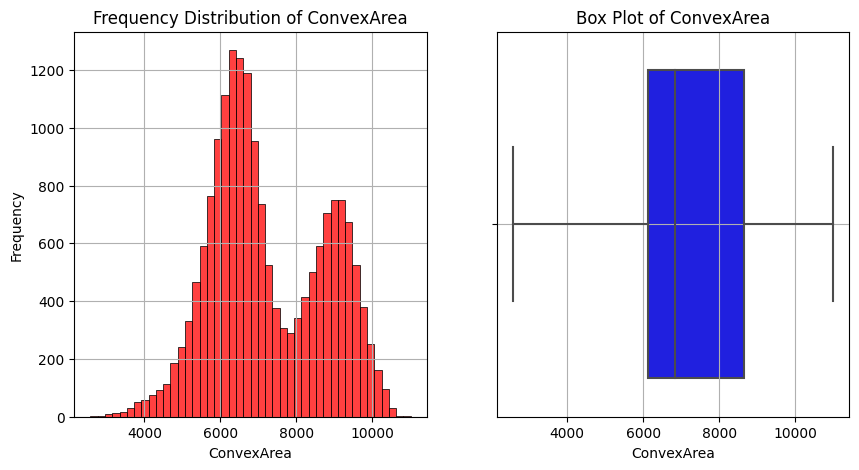

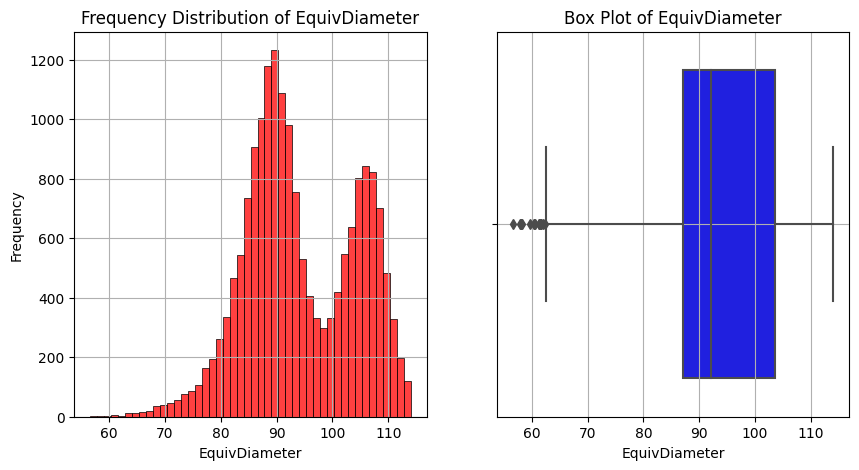

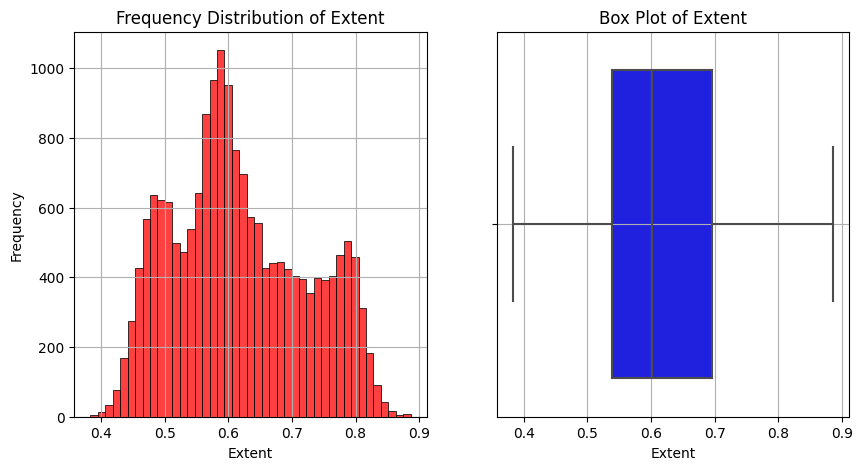

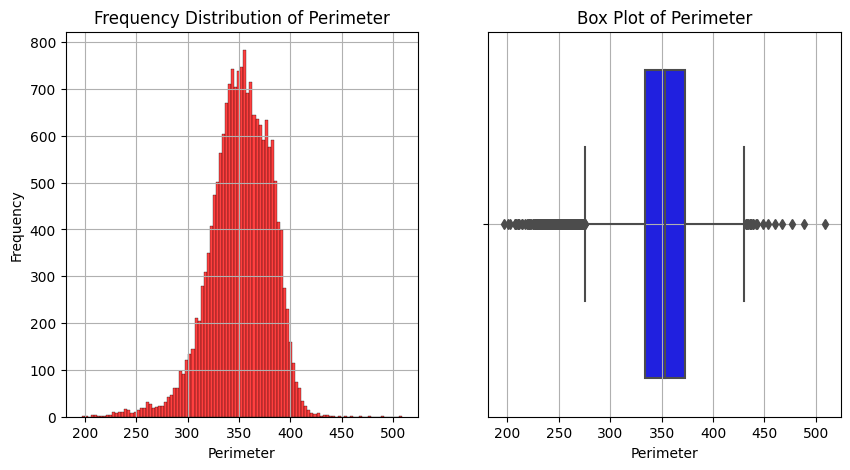

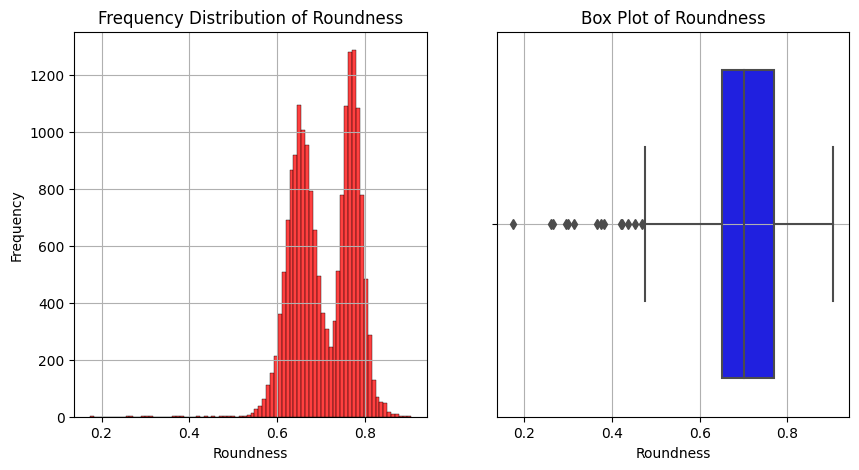

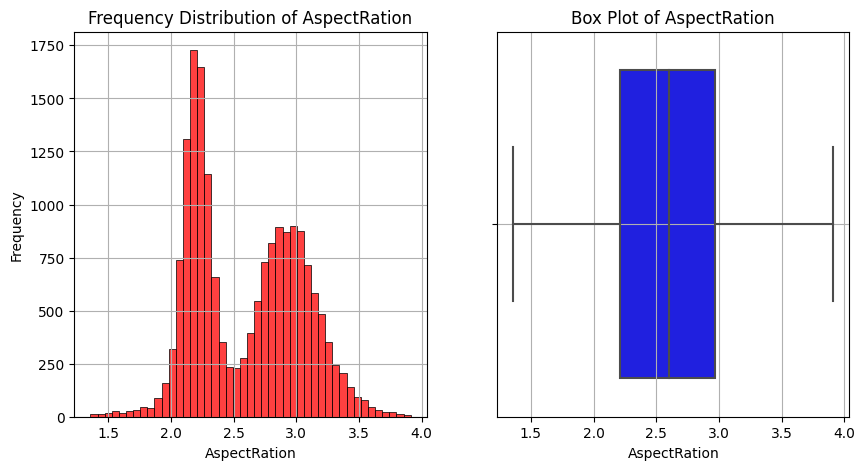

In [17]:
for col in numerical_cols:
    plt.figure(figsize = [10,5])
    plt.subplot(1, 2, 1)
    plt.title("Frequency Distribution of {}".format(col))
    sns.histplot(data = data, x = col, color = "red", cbar = True)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.title("Box Plot of {}".format(col))
    sns.boxplot(data = data, x = col, color = "blue")
    plt.grid()
    plt.show()

Almost all of them are bimodal distribution and few of them are slightly skewed.

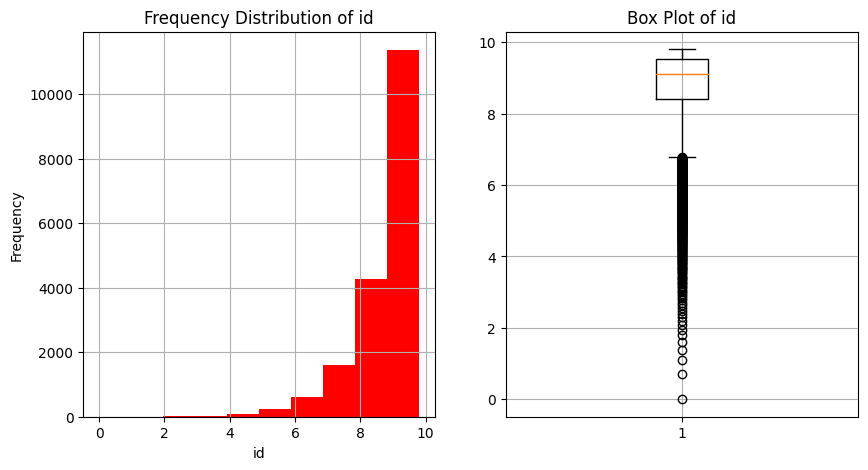

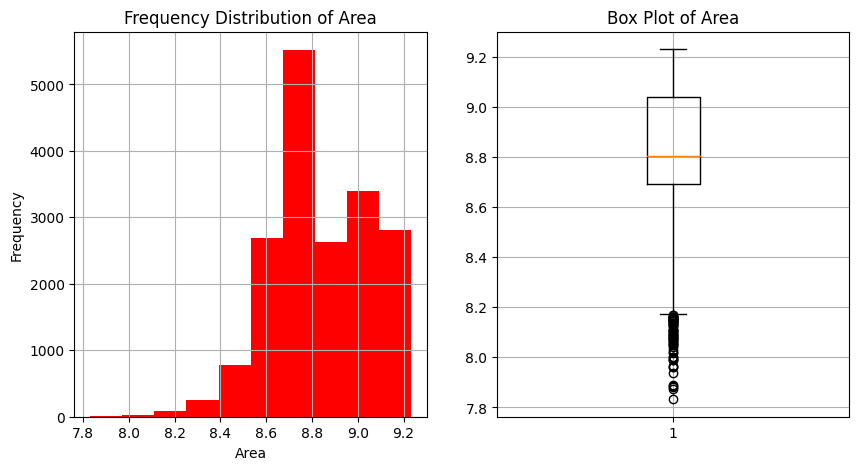

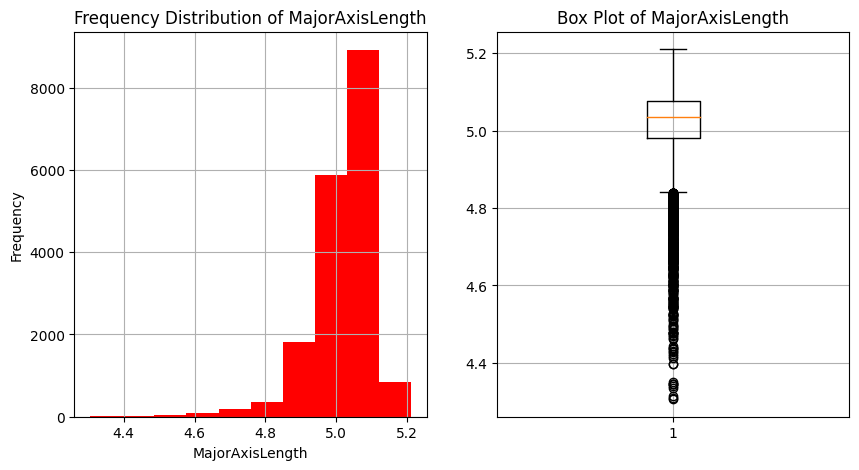

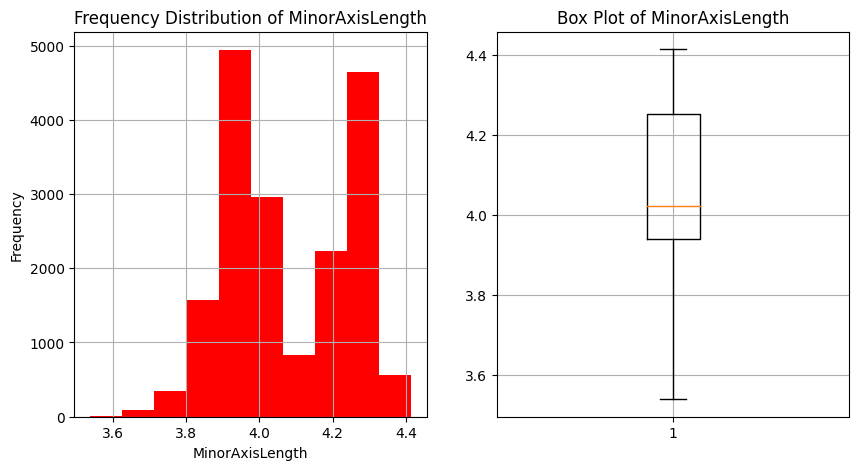

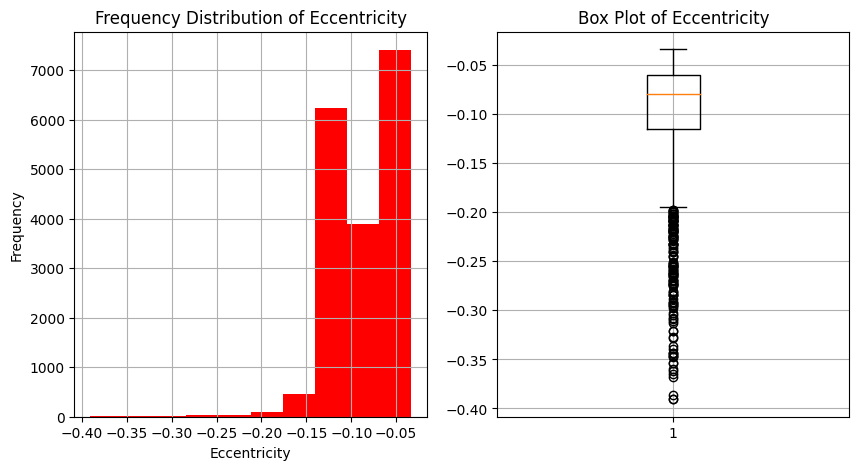

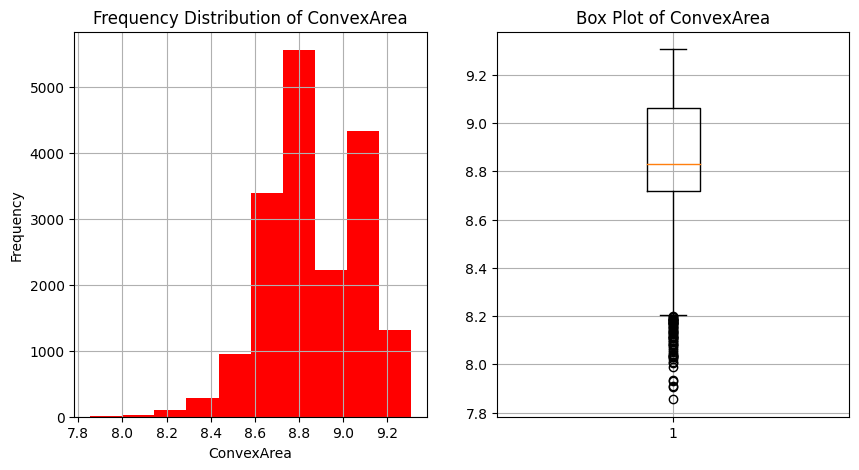

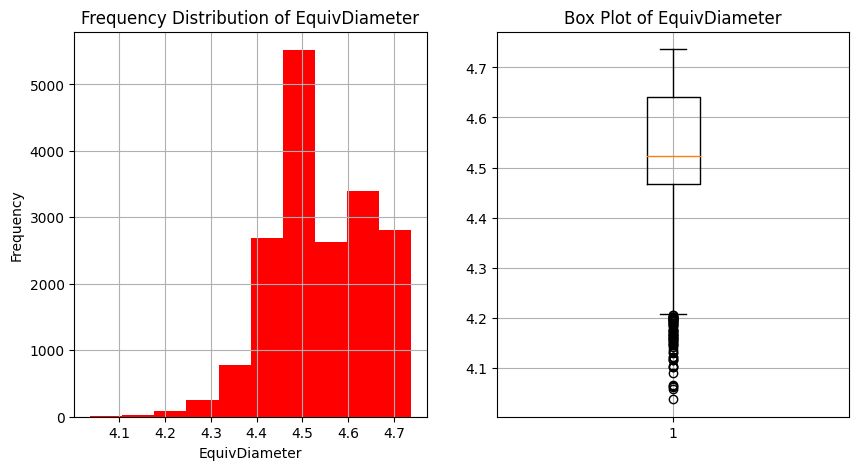

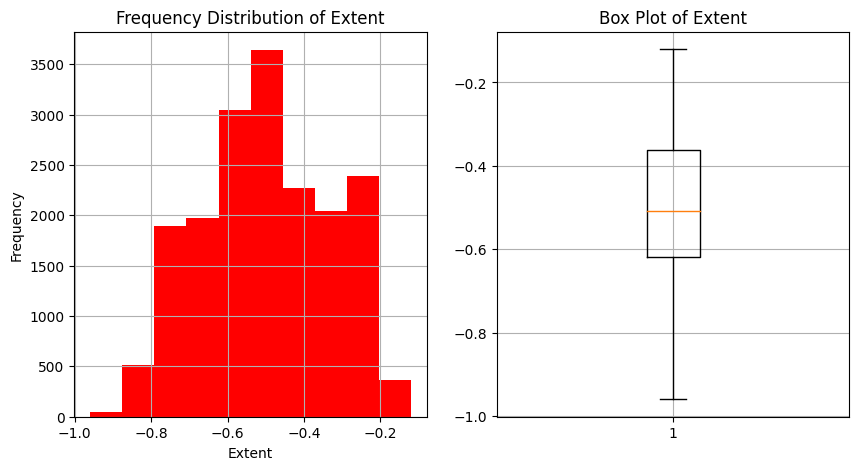

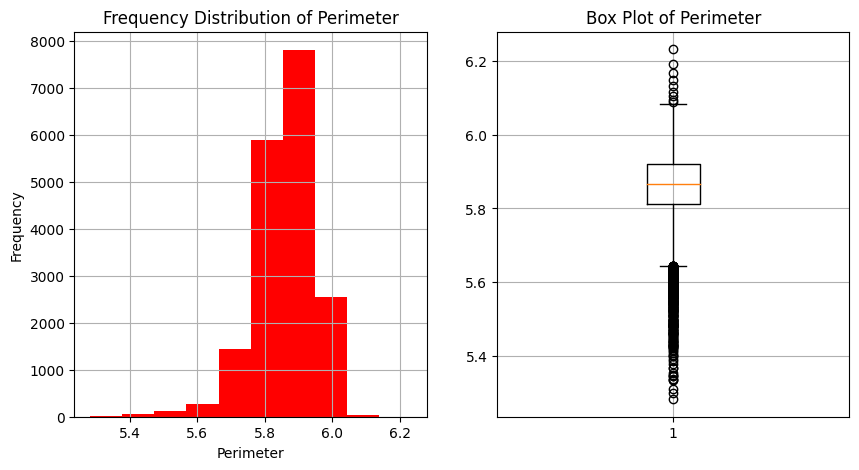

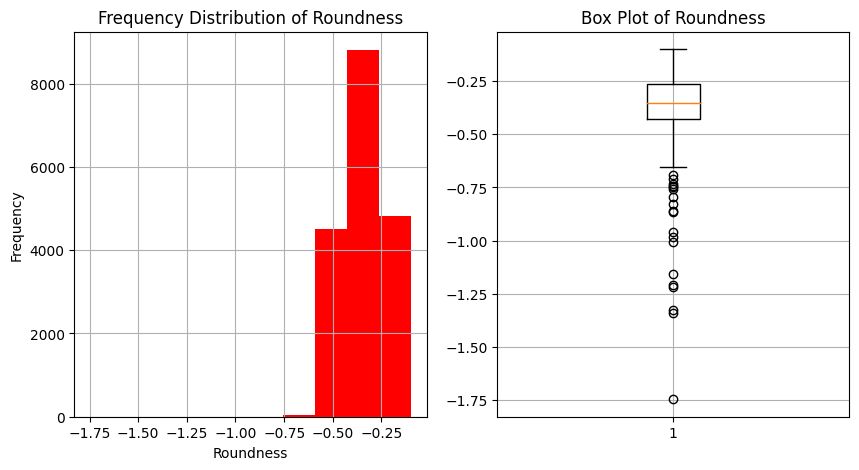

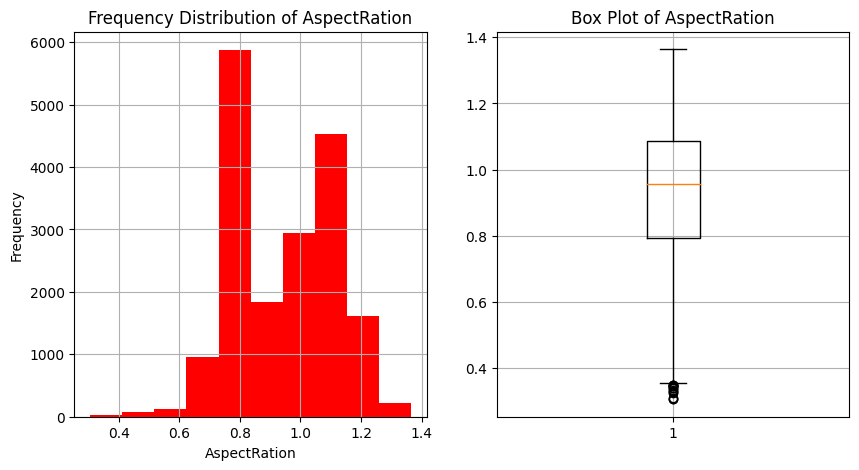

In [18]:
for col in numerical_cols:
    plt.figure(figsize = [10,5])
    plt.subplot(1, 2, 1)
    plt.title("Frequency Distribution of {}".format(col))
    plt.hist(np.log(data[col].values), color = "red")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.title("Box Plot of {}".format(col))
    plt.boxplot(np.log(data[col].values))
    plt.grid()
    plt.show()

Log distribution of data does not differ much from original data.

In [19]:
data.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

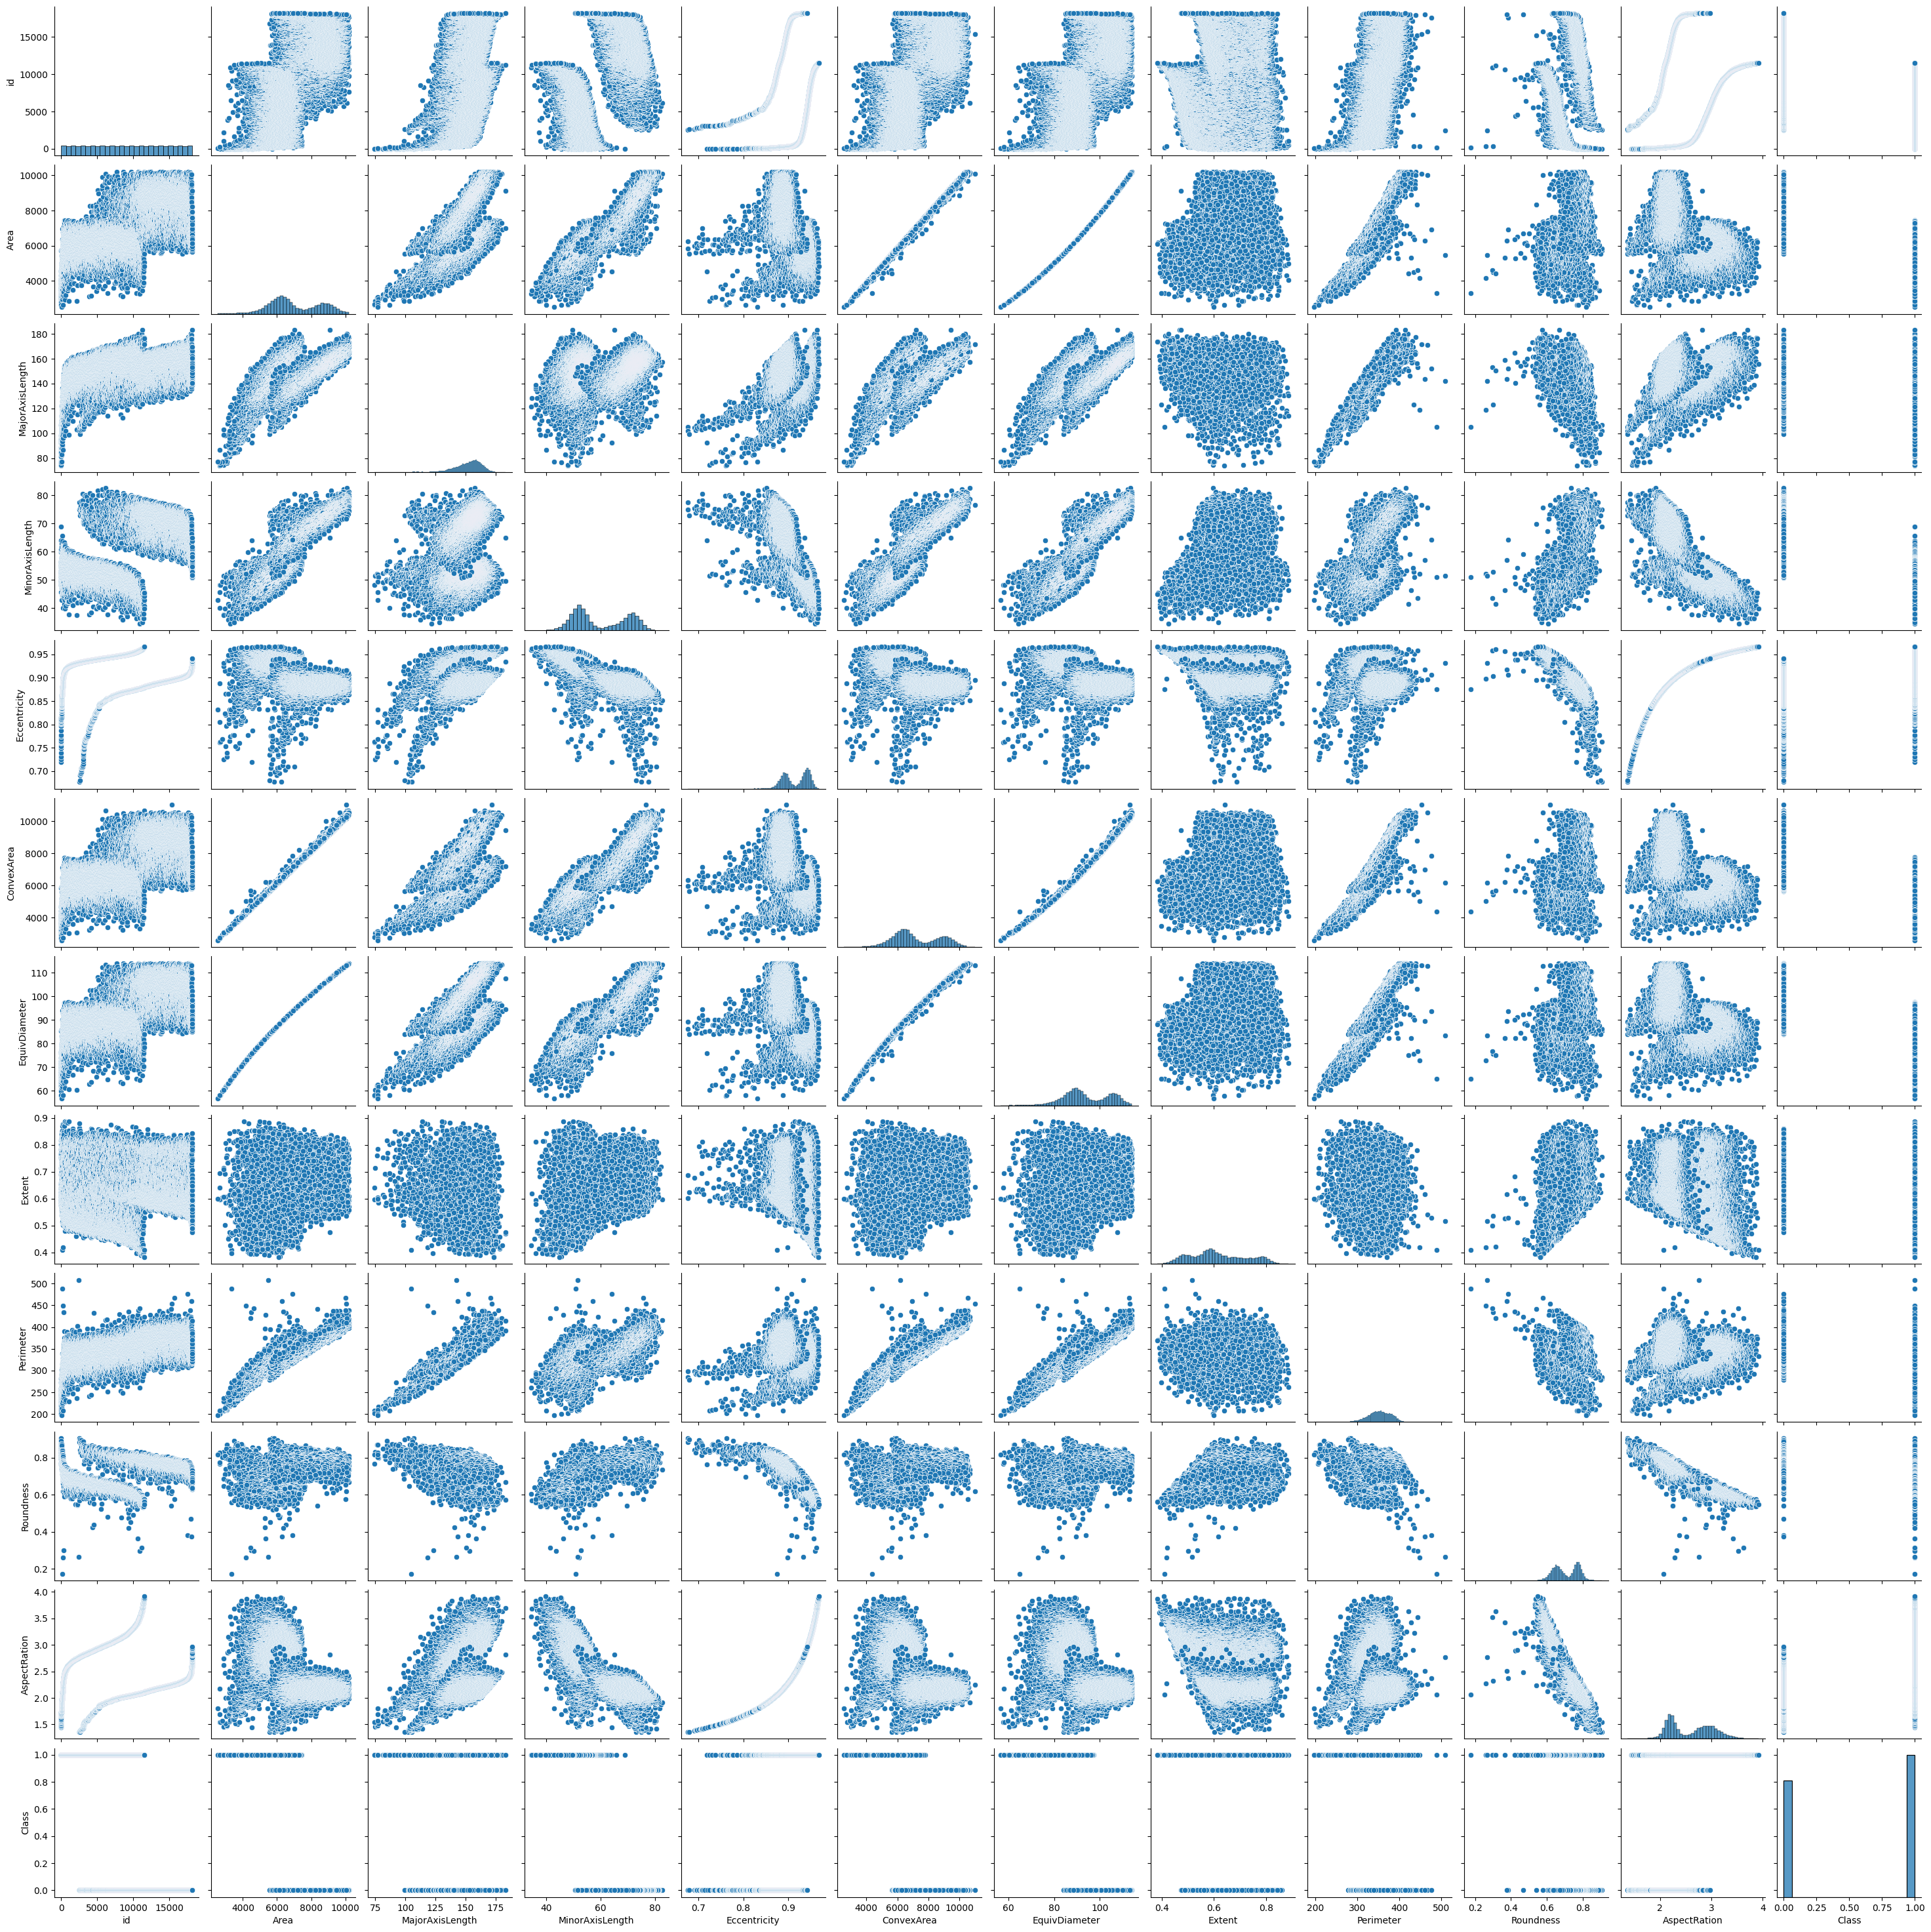

In [20]:
sns.pairplot(data)

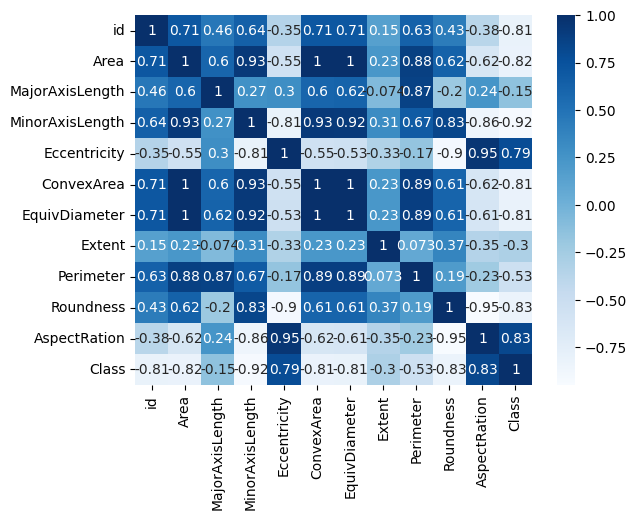

In [21]:
sns.heatmap(data.corr(method = 'pearson'),annot=True,cmap='Blues');


In [22]:
data.drop("id", axis=1, inplace = True)


In [23]:
data

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0      4537        92.229316        64.012769      0.719916        4677   
1      2872        74.691881        51.400454      0.725553        3015   
2      3048        76.293164        52.043491      0.731211        3132   
3      3073        77.033628        51.928487      0.738639        3157   
4      3693        85.124785        56.374021      0.749282        3802   
...     ...              ...              ...           ...         ...   
18180  5853       148.624571        51.029281      0.939210        6008   
18181  7585       169.593996        58.141659      0.939398        7806   
18182  6365       154.777085        52.908085      0.939760        6531   
18183  5960       151.397924        51.474600      0.940427        6189   
18184  6134       153.081981        51.590606      0.941500        6283   

       EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0          76.004525  0.657536    273.085   0.764510      1.440796      1  
1          60.471018  0.713009    208.317   0.831658      1.453137      1  
2          62.296341  0.759153    210.012   0.868434      1.465950      1  
3          62.551300  0.783529    210.657   0.870203      1.483456      1  
4          68.571668  0.769375    230.332   0.874743      1.510000      1  
...              ...       ...        ...        ...           ...    ...  
18180      86.326537  0.498594    332.960   0.663444      2.912535      0  
18181      98.272692  0.647461    385.506   0.641362      2.916910      0  
18182      90.023162  0.561287    342.253   0.682832      2.925396      0  
18183      87.112041  0.492399    343.371   0.635227      2.941216      0  
18184      88.374495  0.489975    338.613   0.672274      2.967245      0  

[18185 rows x 11 columns]

Since there is no "object" type data no need for encoding.

In [24]:
for col in data.columns:
  print(f'Maximum value of {col} is {max(data[col])} and Mininmum value of {col} is {min(data[col])}.\n')

Maximum value of Area is 10210 and Mininmum value of Area is 2522.

Maximum value of MajorAxisLength is 183.2114344 and Mininmum value of MajorAxisLength is 74.13311404.

Maximum value of MinorAxisLength is 82.55076212 and Mininmum value of MinorAxisLength is 34.40989421.

Maximum value of Eccentricity is 0.9667736672 and Mininmum value of Eccentricity is 0.6766470565.

Maximum value of ConvexArea is 11008 and Mininmum value of ConvexArea is 2579.

Maximum value of EquivDiameter is 114.0165591 and Mininmum value of EquivDiameter is 56.66665803.

Maximum value of Extent is 0.8865730584 and Mininmum value of Extent is 0.3832391714.

Maximum value of Perimeter is 508.511 and Mininmum value of Perimeter is 197.015.

Maximum value of Roundness is 0.9047483132 and Mininmum value of Roundness is 0.1745901779.

Maximum value of AspectRation is 3.911844673 and Mininmum value of AspectRation is 1.358128195.

Maximum value of Class is 1 and Mininmum value of Class is 0.



This is for further requirement.

### Train - Test split

In [25]:
x,y = data.drop(["Class"], axis =1 ), data["Class"]


In [26]:
x.shape, y.shape

((18185, 10), (18185,))

In [27]:
x_train,x_test,y_train,y_test = tts(x,y, test_size =  0.25)

### Modelling

In [30]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
clf = SVC()
dtc = DecisionTreeClassifier()
gnb = GaussianNB()

In [31]:
log_reg.fit(x_train, y_train)


LogisticRegression()

In [32]:
clf.fit(x_train, y_train)


SVC()

In [33]:
dtc.fit(x_train, y_train)


DecisionTreeClassifier()

In [34]:
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [35]:
gnb.fit(x_train, y_train)


GaussianNB()

In [36]:
predictions_log_reg_train = log_reg.predict(x_train)
predictions_knn_train = knn.predict(x_train)
predictions_clf_train = clf.predict(x_train)
predictions_dtc_train = dtc.predict(x_train)
predictions_gnb_train = gnb.predict(x_train)

In [37]:
predictions_log_reg = log_reg.predict(x_test)
predictions_knn = knn.predict(x_test)
predictions_clf = clf.predict(x_test)
predictions_dtc = dtc.predict(x_test)
predictions_gnb = gnb.predict(x_test)

In [38]:
results_train_df = pd.DataFrame({"Actual_Data_train":y_train,
              "log_reg_predictions_train":predictions_log_reg_train,
              "KNN_predictions_train":predictions_knn_train,
              "SVC_predictions_train":predictions_clf_train,
              "DTC_predictions_train":predictions_dtc_train,
              "GNB_predictions_train":predictions_gnb_train})

In [42]:
results_train_df.head(20)

Actual_Data_train  log_reg_predictions_train  KNN_predictions_train  \
6125                   1                          1                      1   
9120                   1                          1                      1   
17860                  0                          0                      0   
8101                   0                          0                      0   
7581                   1                          1                      1   
10613                  0                          0                      0   
13981                  0                          1                      0   
1789                   1                          1                      1   
12706                  0                          0                      0   
9205                   1                          1                      1   
12334                  0                          0                      0   
422                    1                          0                      1   
11243                  0                          0                      0   
12846                  0                          0                      0   
9127                   1                          1                      1   
7647                   1                          1                      1   
13630                  0                          0                      0   
399                    1                          1                      1   
14010                  0                          0                      0   
11109                  1                          1                      1   

       SVC_predictions_train  DTC_predictions_train  GNB_predictions_train  
6125                       1                      1                      1  
9120                       1                      1                      1  
17860                      0                      0                      0  
8101                       0                      0                      0  
7581                       1                      1                      1  
10613                      0                      0                      0  
13981                      1                      0                      1  
1789                       1                      1                      1  
12706                      0                      0                      0  
9205                       1                      1                      1  
12334                      1                      0                      1  
422                        0                      1                      0  
11243                      0                      0                      0  
12846                      0                      0                      0  
9127                       1                      1                      1  
7647                       1                      1                      1  
13630                      0                      0                      0  
399                        1                      1                      1  
14010                      0                      0                      0  
11109                      1                      1                      1

In [40]:
results_df = pd.DataFrame({"Actual_Predictions":y_test,
              "log_reg_predictions":predictions_log_reg,
              "KNN_predictions":predictions_knn,
              "SVC_predictions":predictions_clf,
              "DTC_predictions":predictions_dtc,
              "GNB_predictions":predictions_gnb})

In [43]:
results_df.head(20)

Actual_Predictions  log_reg_predictions  KNN_predictions  \
5019                    1                    1                1   
3025                    1                    1                1   
2212                    1                    1                1   
7645                    0                    0                0   
10379                   1                    1                1   
11895                   0                    0                0   
13467                   0                    0                0   
13661                   0                    0                0   
13381                   0                    0                0   
14681                   0                    0                0   
11322                   1                    1                1   
17609                   0                    1                0   
3990                    1                    1                1   
14845                   0                    0                0   
13986                   0                    0                0   
17135                   0                    0                0   
4992                    1                    1                1   
15091                   0                    0                0   
14596                   0                    0                0   
17993                   0                    0                0   

       SVC_predictions  DTC_predictions  GNB_predictions  
5019                 1                1                1  
3025                 1                1                1  
2212                 1                1                1  
7645                 0                0                0  
10379                1                1                1  
11895                1                0                0  
13467                0                0                0  
13661                0                0                0  
13381                0                0                0  
14681                0                0                0  
11322                1                1                1  
17609                1                0                1  
3990                 1                1                1  
14845                0                0                0  
13986                0                0                0  
17135                0                0                0  
4992                 1                1                1  
15091                0                0                0  
14596                0                0                0  
17993                0                0                0

In [44]:
print('\n')
print("The accuracy score for logistic regression model in train is :" ,
      accuracy_score(results_train_df["Actual_Data_train"],results_train_df["log_reg_predictions_train"])*100)

print("The accuracy score for logistic regression model in test is :" ,
      accuracy_score(results_df["Actual_Predictions"],results_df["log_reg_predictions"])*100)


print("\n")
print("The accuracy score for KNN model in train is :" ,
      accuracy_score(results_train_df["Actual_Data_train"],results_train_df["KNN_predictions_train"])*100)

print("The accuracy score for KNN model in test is :" ,
      accuracy_score(results_df["Actual_Predictions"],results_df["KNN_predictions"])*100)


print("\n")
print("The accuracy score for SVC model in train is :" ,
      accuracy_score(results_train_df["Actual_Data_train"],results_train_df["SVC_predictions_train"])*100)

print("The accuracy score for SVC model in test is :" ,
      accuracy_score(results_df["Actual_Predictions"],results_df["SVC_predictions"])*100)


print("\n")
print("The accuracy score for DTC model in train is :" ,
      accuracy_score(results_train_df["Actual_Data_train"],results_train_df["DTC_predictions_train"])*100)

print("The accuracy score for DTC model in test is :" ,
      accuracy_score(results_df["Actual_Predictions"],results_df["DTC_predictions"])*100)


print("\n")
print("The accuracy score for GNB model in train is :" ,
      accuracy_score(results_train_df["Actual_Data_train"],results_train_df["GNB_predictions_train"])*100)

print("The accuracy score for GNB model in test is :" ,
      accuracy_score(results_df["Actual_Predictions"],results_df["GNB_predictions"])*100)




The accuracy score for logistic regression model in train is : 98.797477636017
The accuracy score for logistic regression model in test is : 98.90037387288322


The accuracy score for KNN model in train is : 98.74615046194457
The accuracy score for KNN model in test is : 98.26259071915548


The accuracy score for SVC model in train is : 92.77020090922423
The accuracy score for SVC model in test is : 92.12667692984385


The accuracy score for DTC model in train is : 100.0
The accuracy score for DTC model in test is : 98.48251594457884


The accuracy score for GNB model in train is : 97.60228772547295
The accuracy score for GNB model in test is : 97.84473279085111


In [45]:
log_reg_train = accuracy_score(results_train_df["Actual_Data_train"],results_train_df["log_reg_predictions_train"])*100
log_reg_test= accuracy_score(results_df["Actual_Predictions"],results_df["log_reg_predictions"])*100
KNN_train =  accuracy_score(results_train_df["Actual_Data_train"],results_train_df["KNN_predictions_train"])*100
KNN_test = accuracy_score(results_df["Actual_Predictions"],results_df["KNN_predictions"])*100
SVC_train = accuracy_score(results_train_df["Actual_Data_train"],results_train_df["SVC_predictions_train"])*100
SVC_test= accuracy_score(results_df["Actual_Predictions"],results_df["SVC_predictions"])*100
DTC_train =  accuracy_score(results_train_df["Actual_Data_train"],results_train_df["DTC_predictions_train"])*100
DTC_test = accuracy_score(results_df["Actual_Predictions"],results_df["DTC_predictions"])*100
GNB_train =  accuracy_score(results_train_df["Actual_Data_train"],results_train_df["GNB_predictions_train"])*100
GNB_test = accuracy_score(results_df["Actual_Predictions"],results_df["GNB_predictions"])*100


pd.DataFrame({"model":["log_reg_train","log_reg_test","KNN_train", "KNN_test","SVC_train","SVC_test","DTC_train", "DTC_test","GNB_train", "GNB_test"],
               "Accuracy Scores" :[log_reg_train,log_reg_test,KNN_train,KNN_test,SVC_train,SVC_test,DTC_train,DTC_test,GNB_train,GNB_test]})

model  Accuracy Scores
0  log_reg_train        98.797478
1   log_reg_test        98.900374
2      KNN_train        98.746150
3       KNN_test        98.262591
4      SVC_train        92.770201
5       SVC_test        92.126677
6      DTC_train       100.000000
7       DTC_test        98.482516
8      GNB_train        97.602288
9       GNB_test        97.844733

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Accuracy Scores'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Accuracy Scores'], **{})
chart

### Exporting the Model

In [48]:
import pickle


In [50]:
pickle.dump(data,open('data.pkl','wb'))
pickle.dump(log_reg,open('model.pkl','wb'))